`machine learning course 2025 (с) mssvctr`

### Домашнее задание 1

**Titanic challenge** - самое известное соревнование по Data Science

Используйте данные о пассажирах Титаника, чтобы построить свой классификатор, который предсказывает вероятность гибели пассажира на печально известном корабле

#### Шаг 1: импорт библиотек

Заполните плейсхолдеры

In [1]:
# импортируйте pandas, numpy, seaborn и matplotlib
# не забывайте о том, что каждая из этих библиотек
# использует свои сокращения

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# далее мы импортируем миллион методов из scikit-learn
# эта часть уже выполнена, ура!

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#### Шаг 2: загружаем данные с Титаника (Загрузим файл на локалку)

In [3]:
import requests

url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
response = requests.get(url)
if response.status_code == 200:
    file_name = "titanic.csv"
    with open(file_name, "wb") as file:
        file.write(response.content)
    print(f"Файл успешно скачан и сохранен как {file_name}")
else:
    print(f"Ошибка при загрузке файла. Код статуса: {response.status_code}")

Файл успешно скачан и сохранен как titanic.csv


In [19]:
# откроем файл и сохраним в переменную для работы дальше
with open('titanic.csv', 'r') as file:
    df = pd.read_csv(file)

# выведите первые 5 строк датасета
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Шаг 3: анализ данных

Опишите данные и укажите в комментариях к коду ответы на вопросы:

1. выведите df.info()
  - в каких столбцах есть NaN'ы?
  - ориентируясь на количество NaN'ов в столбцах, определите, какие строки "не жалко" выбросить, а какие лучше сохранить
2. визуализируйте распределение классов по столбцу `Survived`
  - сбалансировали ли классы в нашем датасете?
3. выведите список столбцов, в которых представлены категориальные данные
  - почему категориальные данные нужно будет обработать перед запуском обучения модели?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


/var/folders/71/v4_gcmnn68j2y7_pjcg495x40000gn/T/ipykernel_26170/2223727687.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')


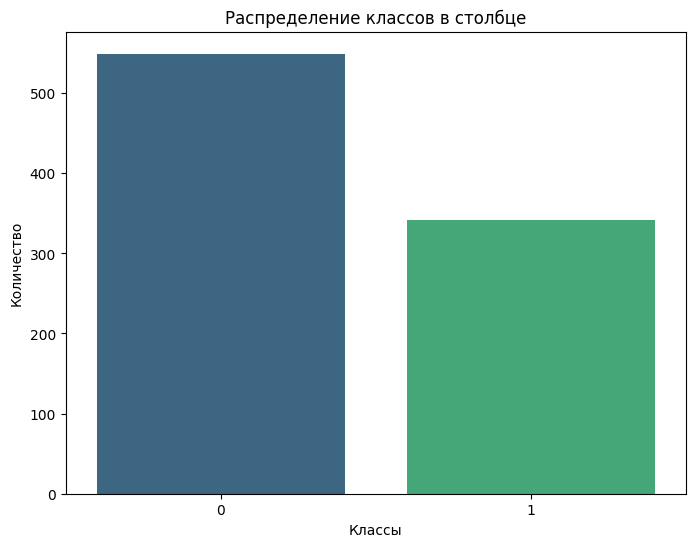

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


In [10]:
### ваш код + ответы на вопросы здесь ###
df.info()
# наны есть в столбцах Age, Cabin, Embarked. 
# Не жалко выбросить столбец Cabin, поскольку большая часть данных там наны, в остальных нанов не так много

# Подсчет количества каждого класса
class_counts = df['Survived'].value_counts()

# Визуализация
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.title('Распределение классов в столбце')
plt.xlabel('Классы')
plt.ylabel('Количество')
plt.show()
# классы несбалансированы, погибших значительно больше выживших

# категориальными будут те столбцы, где тип данных object либо числовой тип, который стал результатом кодирования категории 
# типа не выжил-выжил 0-1. Если object, то там обычно неуникальные значения. Имя в данном случае скорее всего уникально 
# и не очень нам нужно в качестве категории

lst_categories = df.select_dtypes(include='object').columns.to_list()
print(lst_categories)

# потому что для эффективной обработки моделью данные должны быть приведены к числовому типу. 
# Цитата с пары: "простите меня но все что мы делаем в машинном обучении это умножение матриц"

#### Шаг 4: анализ данных

Ответы на эти вопросы помогут вам принять решения для препроцессинга данных:

- требуется ли балансировка классов?
- какие столбцы нужно дропнуть?
- какие данные нужно преобразовать к виду числовых?

**Дропаем столбцы**

Оставим классы в покое и сразу перейдем к очистке таблицы

Есть два пути:

- дропнуть "лишние" столбцы из исходной таблицы
- создать новую таблицу, в которую мы занесем только "нужные" столбцы

Выберите любой способ и создайте новый датафрейм, очищенный от неинформативных столбцов, в которых много NaN'ов

In [17]:
### ваш код здесь ###
# неинформативны столбцы Cabin - слишком много нанов, Name, PassengerId, Ticket - уникальные данные нечислового типа
cleaned_df = df.drop(columns=['Cabin', 'Name', 'PassengerId', 'Ticket'])
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [5]:
"""
ПРИМЕР ОЧИЩЕННОЙ ТАБЛИЦЫ
"""

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,male,22.0,1,0,7.2500,S,0
1,1,female,38.0,1,0,71.2833,C,1
2,3,female,26.0,0,0,7.9250,S,1
3,1,female,35.0,1,0,53.1000,S,1
4,3,male,35.0,0,0,8.0500,S,0


**Categorical --> Numerical**

Для преобразования категориальных данных к виду чисел, в sklearn используется метод `LabelEncoder`

- документация [LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)

Метод автоматически заменяет категориальные метки на целые числа

In [39]:
# образец кодирования столбца 'Sex' с LabelEncoder
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])  # 0 = female, 1 = male
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,1,22.0,1,0,7.2500,S,0
1,1,0,38.0,1,0,71.2833,C,1
2,3,0,26.0,0,0,7.9250,S,1
3,1,0,35.0,1,0,53.1000,S,1
4,3,1,35.0,0,0,8.0500,S,0


Рассмотрим еще один метод: мы имитируем one-hot encoding с помощью метода `get_dummies` из Pandas

- [документация метода](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html)

Принцип работы one-hot-encoding:

- как мы закодируем цифры 1 и 9, чтобы получить разреженный массив?
- создаем матрицу из двух векторов размерностью 10
  ```
  [0, 1, 0, 0, 0, 0, 0, 0, 0, 0] # цифра 1
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 1] # цифра 9
  ```
- единица означает позицию цифры в ряде `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`
- также:
  - единица означает `True` (число находится в этой позиции)
  - ноль означает `False` (число не находится в этой позиции)

При использовании этого метода в датафреймах, мы также создаем три новых столбца (три новых вектора), в которых помечаем `True` соответствие данной метке

In [44]:
# образец кодирования столбца 'Embarked' с get_dummies
# в Embarked у нас три метки: C, Q, S
# метки означают станцию посадки данного пассажира
df = pd.get_dummies(df, columns=['Embarked'])  # one-hot encoding
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived,Embarked_C,Embarked_Q,Embarked_S
0,3,1,22.0,1,0,7.2500,0,False,False,True
1,1,0,38.0,1,0,71.2833,1,True,False,False
2,3,0,26.0,0,0,7.9250,1,False,False,True
3,1,0,35.0,1,0,53.1000,1,False,False,True
4,3,1,35.0,0,0,8.0500,0,False,False,True


Теперь обновите ваш датафрейм: замените с использованием изученных методов категориальные данные на числовые

Изучите документацию и найдите дополнительные материалы, ответьте на вопрос: чем `LabelEncoder` отличается от `get_dummies` и когда какой метод лучше использовать?

In [21]:
# LabelEncoder удобен тем, что он не влияет на размер таблицы, однако полученные числовые данные могут интерпретироваться моделью неправильно, 
# например, что какой-то признак важнее или ближе к одному чем к другому
# get_dummies, в свою очередь, более точно определяется моделью, но в случае больших таблиц "раздувает признаки", 
# потому что для каждого класса в категории создает новый столбец и увеличивает размер таблицы (иногда значительно)
# LabelEncoder лучше подходит для бинарных категорий и категорий, где важен порядок (маленький-средний-большой и т.п.)
# get_dummies лучше для категорий, где порядок не имеет значения, а также для категорий с небольшим кол-вом классов

digit_df = pd.get_dummies(cleaned_df, columns=['Sex', 'Embarked'], dtype=int)
digit_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


**Заполняем пропуски**

Мы убрали лишние столбцы, но NaN'ы по-прежнему есть в нашем датафрейме

Рассмотрим метод `SimpleImputer` из sklearn для заполнения пропусков в данных

- [документация SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html)

In [24]:
# заполняем пропуски в столбце Age
imputer = SimpleImputer(strategy="mean")
digit_df['Age'] = imputer.fit_transform(digit_df[['Age']])
digit_df.info()

# у метода SimpleImputer есть следующие стратегии замены данных (нанов): mean - среднее значение для чисел, median - медиана для чисел, 
# most_frequent - самое частое значение для всех данных, constant - константа для всех данных
# для категорий подойдут most_frequent и constant

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Age         891 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Sex_female  891 non-null    int64  
 7   Sex_male    891 non-null    int64  
 8   Embarked_C  891 non-null    int64  
 9   Embarked_Q  891 non-null    int64  
 10  Embarked_S  891 non-null    int64  
dtypes: float64(2), int64(9)
memory usage: 76.7 KB


Изучите документацию sklearn и ответьте на вопросы: какие стратегии доступы для работы с методом SimpleImputer? Чем они отличаются? Какие стратегии подойдут для работы с категориальными данными?

**Feature Engineering**

> Данные - это пища для вашей модели

Слишком шумные данные вызовут отравление модели (кстати, один из методов киберпреступности, построенный на работе с данными, так и называется - data poisoning!)

Недостаточность в данных может стать причиной недообучения (underfitting), поэтому мы можем не только дропать, но и добавлять фичи, т.е. признаки, на которых будет учиться наша модель

Этот процесс называется **feature engineering**

In [28]:
# Добавим фичу Family size = SibSp + Parch + 1 (единица обозначает самого пассажира)
digit_df['FamilySize'] = digit_df['SibSp'] + digit_df['Parch'] + 1

# Фича Alone для тех, кто путешествует один
digit_df['IsAlone'] = (digit_df['FamilySize'] == 1).astype(int)

digit_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,FamilySize,IsAlone
0,0,3,22.0,1,0,7.2500,0,1,0,0,1,2,0
1,1,1,38.0,1,0,71.2833,1,0,1,0,0,2,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1,1,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1,2,0
4,0,3,35.0,0,0,8.0500,0,1,0,0,1,1,1


Добавьте любую новую фичу в датафрейм, которая легко выводится из данных

Например, можно вытащить обращения к пассажирам из столбца `Name` из исходной таблицы: `Mr., Mrs., Dr.`

Для этого изучите внимательно данные, познакомьтесь с описанием датасета на Kaggle

- https://www.kaggle.com/c/titanic/

Вам нужно самостоятельно решить, что можно извлечь из этих данных, как назвать новую фичу и избавиться от категориальных меток

In [54]:
### ваш код здесь ###
# воспользуемся вашим советом и извлечем статус пассажира, назвав колонку 'Status'. Применим регулярки
import re

def extract_status(name):
    match = re.search(r',\s([A-Za-z]+)\.', name)
    if match:
        return match.group(1)
    return np.nan

digit_df['Status'] = df['Name'].apply(extract_status)
print(set(digit_df['Status']))
# избавляемся от нанов с помощью изученного метода
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
digit_df['Status'] = imputer.fit_transform(digit_df[['Status']]).flatten() 
digit_df.head()

{'Rev', 'Dr', 'Col', 'Mlle', 'Mme', 'Miss', 'Sir', 'Capt', nan, 'Mrs', 'Major', 'Lady', 'Don', 'Mr', 'Jonkheer', 'Master', 'Ms'}


,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,FamilySize,IsAlone,Status
0,0,3,22.0,1,0,7.2500,0,1,0,0,1,2,0,Mr
1,1,1,38.0,1,0,71.2833,1,0,1,0,0,2,0,Mrs
2,1,3,26.0,0,0,7.9250,1,0,0,0,1,1,1,Miss
3,1,1,35.0,1,0,53.1000,1,0,0,0,1,2,0,Mrs
4,0,3,35.0,0,0,8.0500,0,1,0,0,1,1,1,Mr


### Анализ новой категории `Status`
Имеем следующее множество статусов пассажиров:
`{'Rev', 'Dr', 'Col', 'Mlle', 'Mme', 'Miss', 'Sir', 'Capt', nan, 'Mrs', 'Major', 'Lady', 'Don', 'Mr', 'Jonkheer', 'Master', 'Ms'}`
Несмотря на то что их достаточно много, они довольно логично разбиваются на статусы, которые могли дать преимущество на судне и которые скорее всего его не давали.

Привилегированные статусы (`Privileged`) - военные, титулованные особы, врачи, священники

Нейтральные статусы (`Neutral`) - обращения по полу по типу Mr, Ms, Miss, Mlle, Mme

Таким образом, мы можем использовать метод LabelEncoder, поскольку у нас есть бинарная классификация и порядок данных важен - 0 для Neutral и 1 для Privileged.

In [55]:
def classify_status(status):
    neutral_status = ['Ms', 'Mlle', 'Mme', 'Miss', 'Mrs', 'Mr', 'Master']
    privileged_status = ['Rev', 'Dr', 'Col', 'Sir', 'Capt', 'Major', 'Lady', 'Don', 'Jonkheer']
    if status in neutral_status:
        return 'Neutral'
    if status in privileged_status:
        return 'Privileged'

digit_df['Status'] = digit_df['Status'].apply(classify_status)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,FamilySize,IsAlone,Status
0,0,3,22.000000,1,0,7.2500,0,1,0,0,1,2,0,Neutral
1,1,1,38.000000,1,0,71.2833,1,0,1,0,0,2,0,Neutral
2,1,3,26.000000,0,0,7.9250,1,0,0,0,1,1,1,Neutral
3,1,1,35.000000,1,0,53.1000,1,0,0,0,1,2,0,Neutral
4,0,3,35.000000,0,0,8.0500,0,1,0,0,1,1,1,Neutral
5,0,3,29.699118,0,0,8.4583,0,1,0,1,0,1,1,Neutral
6,0,1,54.000000,0,0,51.8625,0,1,0,0,1,1,1,Neutral
7,0,3,2.000000,3,1,21.0750,0,1,0,0,1,5,0,Neutral
8,1,3,27.000000,0,2,11.1333,1,0,0,0,1,3,0,Neutral
9,1,2,14.000000,1,0,30.0708,1,0,1,0,0,2,0,Neutral


In [61]:
digit_df['Status'] = LabelEncoder().fit_transform(digit_df[['Status']]) # приводим к числовому типу, neutral = 0, privileged = 1
digit_df.head()

/Users/vldlbnv/Python/.venv/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,FamilySize,IsAlone,Status
0,0,3,22.0,1,0,7.2500,0,1,0,0,1,2,0,0
1,1,1,38.0,1,0,71.2833,1,0,1,0,0,2,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1,1,1,0
3,1,1,35.0,1,0,53.1000,1,0,0,0,1,2,0,0
4,0,3,35.0,0,0,8.0500,0,1,0,0,1,1,1,0


#### Шаг 4: обучение

Создаем пары `data - label`

In [66]:
X = digit_df.drop(columns=['Survived']) # данные = все столбцы кроме метки Survived
y = digit_df['Survived'] # метки = только столбец Survived

Вспомните прошлое занятие: примените метод `train_test_split`

Создайте 2 выборки данных в соотношении 80 на 20

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8)

Изучите информацию о том, как работает логистическая регрессия и ответьте на вопрос: какую роль играет `StandardScaler` в работе с логистической регрессией?

In [68]:
# StandardScaler необходим, чтобы поместить данные в промежуток от 0 до 1. 
# У разных данных разный диапазон значений, например, возраст отличается от количества детей в значительной степени. 
# Чтобы признак имел схожий вес на предсказание, его нужно стандартизировать

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Обучение, как и в случае работы с линейной регрессией, займет всего пару строк

Опишите основной принцип работы логистической регрессии своими словами (2-3 предложения достаточно)

Предварительно изучите материал: https://web.stanford.edu/~jurafsky/slp3/5.pdf

In [69]:
# логистическая регрессия - алгоритм мл, который справляется с классификацией, 
# то есть предсказыванием того, к какому классу относится тот или иной объект. 
# Для этого он учитывает фичи, на основе которых делает предположение. 
# Это достаточно простой и быстрый алгоритм, но он не очень хорошо справляется с нелинейными зависимостями

log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

# предсказания
y_pred_log = log_reg.predict(X_test_scaled)

# вывод репорта
print("Logistic Regression Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

Logistic Regression Performance:
Accuracy: 0.7821229050279329
              precision    recall  f1-score   support

           0       0.77      0.85      0.81        97
           1       0.79      0.71      0.75        82

    accuracy                           0.78       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.78      0.78      0.78       179



Повторим магию и обучим наивные байесовский классификатор. Что значит `Gaussian` в названии метода `GaussianNB`? Изучите документацию метода, чтобы ответить на этот вопрос

Почему для этого метода не нужен StandardScaler?

In [72]:
# гауссово распределение - синоним нормального распределения, когда признаки группируются вокруг среднего значения. 
# StandardScaler не нужен, так как алгоритм основан на теореме Байеса, 
# а она вычисляет вероятности, которые и так находятся в диапазоне от 0 до 1

nb = GaussianNB()
nb.fit(X_train, y_train)

y_pred_nb = nb.predict(X_test)

print("Naïve Bayes Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

Naïve Bayes Performance:
Accuracy: 0.7653631284916201
              precision    recall  f1-score   support

           0       0.78      0.79      0.79        97
           1       0.75      0.73      0.74        82

    accuracy                           0.77       179
   macro avg       0.76      0.76      0.76       179
weighted avg       0.77      0.77      0.77       179



Мы молодцы! Отрисуем результат с помощью матрицы ошибок

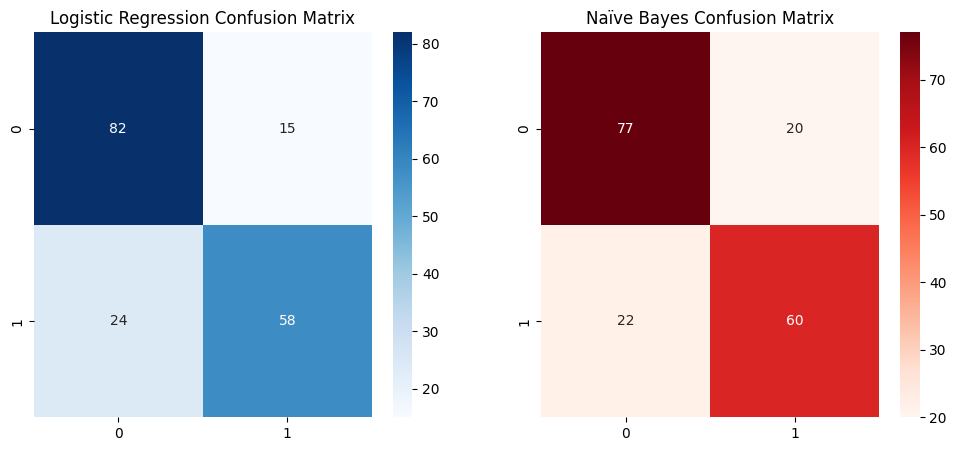

In [73]:
conf_matrix_log = confusion_matrix(y_test, y_pred_log) ### примените метод confusion_matrix для результатов логистической регрессии ###
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb) ### примените метод confusion_matrix для результатов байесовского классификатора ###

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(conf_matrix_log, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Logistic Regression Confusion Matrix")

sns.heatmap(conf_matrix_nb, annot=True, fmt="d", cmap="Reds", ax=axes[1])
axes[1].set_title("Naïve Bayes Confusion Matrix")

plt.show()